###  Islands: Python Foundations - Chapter 1

[Back to Main Page](0_main_page.ipynb)

[How to use this book interactively on Deepnote](99_how_to_use_this_book.ipynb)

[Download this book](99_how_to_use_this_book_local.ipynb)

<br>

<h1> <center> Populations, Samples, Questions: Why Learn Python? </center> </h1> 

## What exactly is python?

Python is a programming language. Programming languages are, at root, *fancy calculators* (to borrow [Dr Juan Klopper's term](https://rpubs.com/juanhklopper/intro_to_R_for_biostats)). They let us write an explicit set of instructions for how a computer should analyse data, step by step.

Relative to traditional 'point-and-click' statistics software, code-based analysis is useful for scientific transparancy, as other researchers can read the code see exactly what analysis was performed. This makes it easier to spot mistakes in the analysis. It is also good for reproducibility, as other researchers can easily run the code themselves to check the results, or apply the analysis to new data to see if the result is replicable.

Python was designed for [readability](https://docs.python-guide.org/writing/style/). So it not only let's us write analyses so that other researchers can see exactly how we've arrived at a result/conclusion, it also keeps that analysis readable and understandable to a human. 

Python is also open-source and free to use (unlike many traditional statistics programs!). This means you can learn it and beginning analysing data free of charge (assuming you have a computer and an internet connection, which if you're reading this, it seems that you do...)

## Why should you learn python?
This page will not teach you any coding directly (don't worry, the rest of this textbook will!). However, in my experience, when I was learning to code, I found that some introductory texts/materials jumped straight into the coding, and left me with the question:
> 'but *why* would I need to do this? What would I use this for?'

This page will walk through the stages involved in using python to conduct a data analysis to answer some interesting questions. It will show you *what* python can easily be used to do, rather than *how* to use python. My hope is that this page will show you why it worth putting in the time to learn python. The rest of the textbook will then show you the tools you need to use python to run a similar analysis yourself. 

Ultimately, it is the questions we use python to answer which are important. The examples in this textbook will use simulated data (because it easier for me to explain certain concepts by generating data which clearly illustrates them). But the concepts and analyses apply directly to real-world data as well, and at the end of the textbook I will show you how to read real data into python, and perform similar analyses on that real-world data.

(If you would rather skip straight to the coding, you can go directly to the [next page](2_lists_indexing.ipynb)).

# Jupyter notebooks

First, to orient you to the way this textbook is setup, I'll say a few things about [Jupyter notebooks](https://jupyter.org/) (the format this textbook is written in). Jupyter notebooks allow for the integration of text and code. Each notebook is divided up into *cells*. You're currently reading the output of *markdown cell* which displays text. 

The cell below (with the darker background) is a code cell, which is used for executing code. Anything written in a code cell that comes after the `#` symbol  is a 'comment'. This is used for leaving notes alongside the code, but the comments themselves do not function as code. The comments in this book will explain what each line of code is doing. Do not worry if you do not understand any of the code at first, or if it takes some time to understand it, this is normal.*

I recommend that you use this textbook interactively, by running it on Deepnote ([see this page](99_how_to_use_this_book.ipynb)) or downloading it and running it locally on your computer, using Jupyter notebook([see this page](99_how_to_use_this_book_local.ipynb)).

If you are using this book interactively, please run the code cell below, by following these instructions:

<br>
<center> ↓↓↓ <b> Before reading on, please run the code cell below</b>. Click on the cell and press `shift` and `Enter` together.↓↓↓ </center>
<br>

In [1]:
# RUN THIS CELL TO IMPORT THE LIBRARIES NEEDED FOR THIS PAGE

# 'import' tells python to get a set of functions (which is called a library). In the first case this is 
# the numpy library. The 'as' tells python to name the library something (to save us typing out 'numpy'). In this case
# we name the library 'np'
import numpy as np

# here we import the pandas library and name it 'pd'
import pandas as pd

# here we import the matplotlib.pyplot library and name it 'plt'
import matplotlib.pyplot as plt

# import the scipy.stats library 
import scipy.stats

# import the statsmodels library
import statsmodels.api as sm

# import the py_found library, containing a set of custom functions for this textbook
import py_found

## An impaired island

<br>

<center> <img src="https://github.com/pxr687/islands_python_foundations/blob/master/images/impaired_island.png?raw=true" width="400"> </center>

<br>

Imagine an island with exactly 1000 people living on it. Further imagine, that you are visiting this island with a group of scientists, from various disciplines, in order to conduct research.

A neuropsychologist in your research group states that there is a high prevalence of cognitive impairment on the island, amongst residents of all age groups. That is, residents of the island perform worse on various cognitive tasks than residents of similar islands in the surrounding area. In fact, the neuopsychologist states that all 1000 residents show some signs of cognitive impairment. The island is heavily polluted, and an epidemiologist in your research group has suggested that this is what is leading to cognitive impairment in the indviduals who live on the island.

You group is on the island to do two things: 

* to help analyse data from a clinical trial which is happening on the island. The trial is of a drug hypothesized to reduce cognitive impairment.
* to investigate the hypothesis that the high level of pollution on the island is the cause of the cognitive impairment.

## A clinical trial

The clinical trial that is happening on the island is of a drug called Adirudin. In the trial, 100 participants have been randomly assigned into one of two groups. ('Randomly' in this context means that each participant had the same probability of ending up in either group; they were randomized to each group using a coinflip). 

Participants in the placebo group receive an inert pill, which is not pharmacologically active e.g. it does nothing to reduce cognitive impairment.

Participants in the treatment group receive a specific dose of Adirudin, which is hypothesized (but not proven) to reduce cognitive impairment.

The trial has recently finished. At the end of the study, both groups of participants completed an assessment questionairre which measures cognitive impairment. Their score at the end of the study is compared to their score at the beginning (before they received either the placebo pill or Adirudin). 

The score from the end of the study is subtracted from the score at the start of the study, which shows how each participant's score has changed. If the drug works, we would expect more positive scores in the drug group than the placebo group, meaning that the drug *reduced* symptoms of cognitive impairment.

The dataframe below shows the results of the trial:

*Note: Adirudin is not a real drug!*

In [2]:
# just run this cell (press 'Control' and 'Enter' together) to generate the table
placebo_change, drug_change, trial_df = py_found.data_gen_trial(1000)
pd.set_option('display.max_rows', None)
# show the table
trial_df

,group,change
0,placebo,-
1,placebo,+
2,placebo,-
3,placebo,-
4,placebo,-
5,placebo,+
6,placebo,+
7,placebo,-
8,placebo,+
9,placebo,-


Each row of the table contains the data for one participant in the trial. The `group` column tells us whether that participant was in the `placebo` group or the `drug` group.

The `change` column shows a `+` or a `-` indicating whether a participant's cognitive impairment score improved or got worse at the end of the trial, relative to their score at the beginning of the trial.

Before running any statistical analyses, it is always important to graphically inspect the data, because:

><i><center>'The dominant task of the human cortex is to extract visual information from the activity patterns on the retina. Our visual system is therefore exceedingly good at detecting patterns in visualized data sets. As a result, one can almost always see what is happening before it can be demonstrated through a quantitative analysis of the data. Visual data displays are also helpful at finding extreme data values, which are often caused by [...] mistakes in the data acquisition.' </i> <br> (page 51, Haslwanter, 2016, An Introduction to Statistics with Python)<center>

As you can see from the table above, it is pretty hard to see patterns in the raw data. The graph below shows the percentage of participants in each group who showed a positive improvement at the end of the trial:

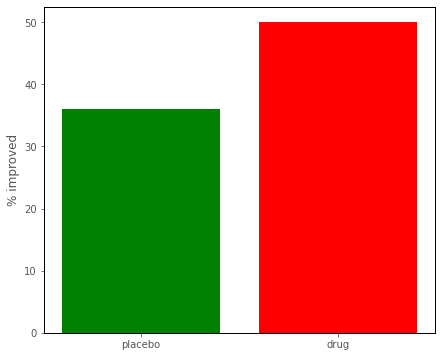

In [3]:
# this code just generates the graph below

# the command below make plots look like R (another programming language, with prettier plots than python (in my opinion))
py_found.r_ify()

# this code creates the plot
plt.bar(['placebo', 'drug'], 
        [np.sum(placebo_change == '+')/len(placebo_change)*100, np.sum(drug_change == '+')/len(drug_change)*100 ],
       color = ['green', 'red'])
plt.ylabel('% improved')
plt.show()

It certainly looks as though a higher percentage of the drug group showed a positive improvement.

Your research team calculate the actual difference in the percentages between the two groups:

In [4]:
# just run this cell, it calculates, and then shows, the difference in the percentages
print('There was a', np.round(np.sum(drug_change == '+')/len(drug_change)*100 - np.sum(placebo_change == '+')/len(placebo_change)*100, 2), '% difference in the percentage of positive responders between the groups.')

There was a 14.0 % difference in the percentage of positive responders between the groups.


So, the percentage of the drug group who showed a positive improvement was 14% larger than the percentage in the placebo group who showed a positive improvement.

Can we conclude that the drug works? 

Another way of phrasing this question is:

* If we conducted the trial with all 1000 people on the island would we see the same effect? E.g. if 500 of the residents were randomly assigned to receive a placebo, and 500 of them randomly assigned to receive Adirudin, would we see something like a 14% greater percentage of positive responders amongst the 500 who received Adirudin?

Remember that the trial had only 100 participants. This is far short of the 1000 people who make up the population of the island. What if the result is a fluke e.g. it does not reflect the pattern we would observe if the drug was given to all 1000 islanders? It might happen, for instance, that our drug group, just through random sampling, contained people who were more likely to show spontaenous improvement in their symptoms.


## What does it mean for a result to be a 'fluke'? 

A 'fluke' result just means that the pattern we see in our sample is not reflective of the pattern in the population that the sample came from. We are almost never in a position where we can analyse data from an entire population. So we must make inferences about that population from the samples we have. We need to infer what the entire unseen population of islanders looks like, based on the information we have from 100 of them. 

In this context, a fluke result would mean that the 14% difference between the groups in the trial would not be reflected if we conducted the same trial with all 1000 residents of the island. The participants in the trial were randomly sampled from the population. Random sampling should, on average, produce samples which are representative of the underlying population. So how can a fluke result come about by random sampling?

Let's think about how the population of 1000 islanders would look, if there was <b> exactly 0% difference between the groups </b>. The two graphs below show how the data could look in this scenario. (There are many ways the data could look, but the important feature is that the percentage difference between the groups is 0%).

The graph on the left shows the change scores for all 1000 islanders, in this hypothetical scenario where the drug is 0% effective. Each of the 1000 symbols shows the change score for for one person (either `+` or `-`). The color of the symbol shows which group the islander was in (green for `placebo`, red for `drug`). (The location on the graph of each symbol doesn't have any meaning, only the type of symbol and its color: imagine all the islanders are standing in a field, and the graph shows a `+` or `-` superimposed over each participant's position in the field).

The graph on the right shows the percentage of positive responders in each group, from the hypothetical data of all 1000 islanders:

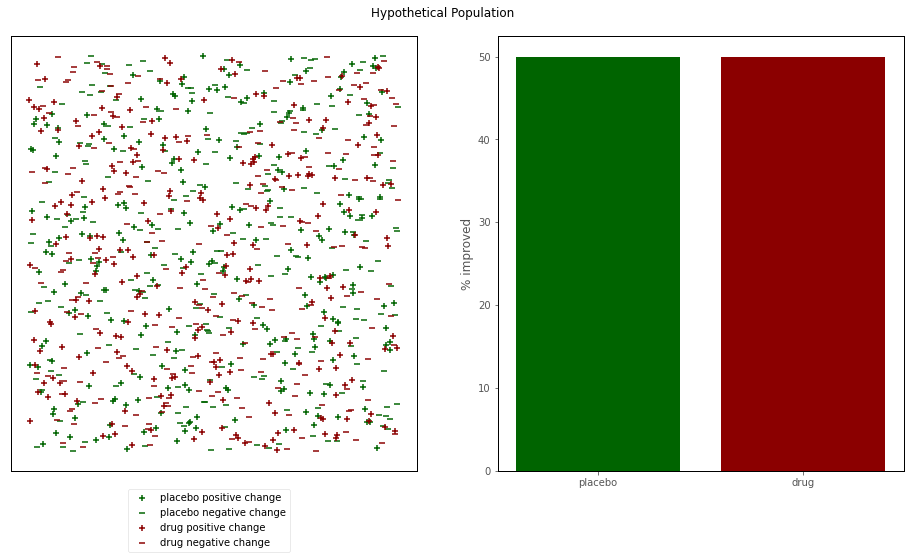

In [5]:
# just run this cell, it generates the plots below
pop_df, placebo, drug = py_found.trial_pop_plot()

In this hypothetical scenario, the drug clearly doesn't work. In fact, exactly 50% of each group showed a positive response to treatment, the drug is literally as ineffective as it could possibly be.

Imagine if we randomly selected 100 of the change scores, from the graph on the left above. We would do this by writing each islander's name on a piece of paper and putting them in a hat, shaking the hat vigourously for several minutes to shuffle around the scores, and then randomly drawing 100 of them. Would the pattern in that sample of 100 scores be the same as the pattern we see when we look at all 1000 scores?

What if the 100 scores happened to be the 100 scores shown on the lefthand graph below (the other 900 scores have been grayed out)? The graph on the right shows the percentage of positive responders for each group in this sample of 100:

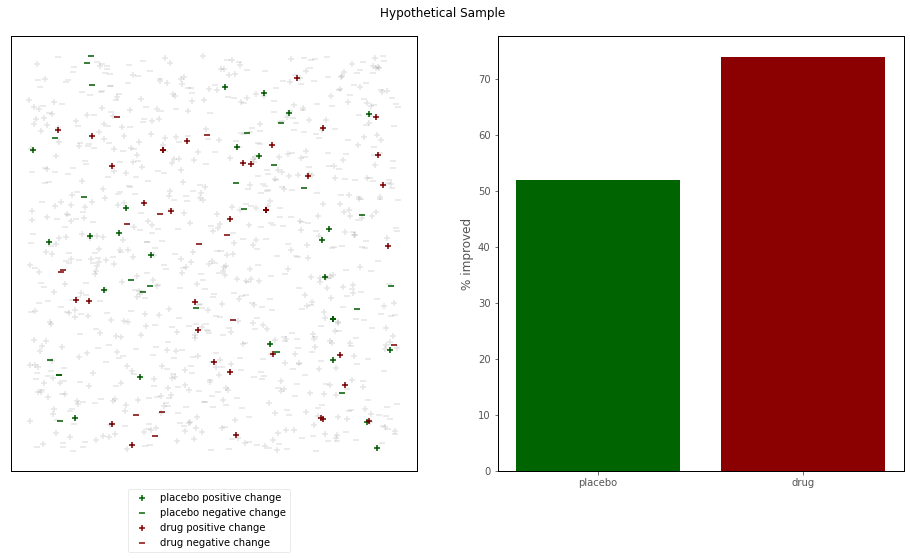

In [6]:
py_found.trial_sample_plot(pop_df, placebo, drug, placebo_change, drug_change)

These scores in this sample of 100 were taken from the 1000 scores. In the 1000 scores, the percentage of positive treatment responders is *exactly* the same for those who received placebo and those who received the drug.

Yet, in this sample of 100 scores, which were taken from the 1000 scores, the pattern is completely different in the sample relative to the population of all 1000 islanders. 

In the sample of 100 scores, the percentage of positive responders in the drug group is considerably higher than in the placebo group. 

This is how a fluke result can happen. If, just by chance, a sample randomly drawn from a population shows a pattern that is not reflective of the pattern in the underlying population. 'Just by chance' in this context means that the data was a random sample from the population.

The 100 datapoints shown above give a misleading picture of the underlying population. How do we know if the sample from the actual clinical trial is misleading in this way?

Remember that the data from the actual trial showed this pattern:

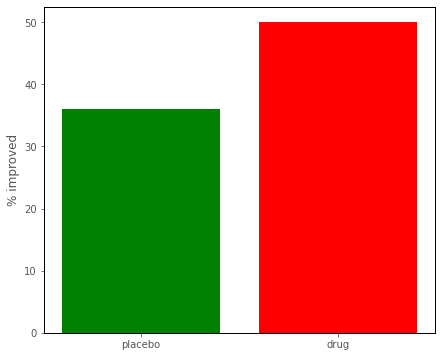

In [7]:
# this code creates the plot
plt.bar(['placebo', 'drug'], 
        [np.sum(placebo_change == '+')/len(placebo_change)*100, np.sum(drug_change == '+')/len(drug_change)*100 ],
       color = ['green', 'red'])
plt.ylabel('% improved')
plt.show()

In the actual trial, relative to the placebo group, there was a 14% difference in the percentage of the drug group which showed a positive improvement.

How do we know if this actual sample is a fluke?

## The Null Hypothesis

This is a question of deciding which is more probable, out of two mutually exclusive hypotheses:

<br>

* <b> The null hypothesis </b>: the drug does not work. If we conducted the trial with all 1000 residents of the island, we would not observe a difference in the percentage of positive responders in the placebo group vs the drug group.
<br>

* <b> The alternative hypothesis </b>: the drug works. If we conducted the trial with all 1000 residents of the island, we would  observe a greater percentage of positive responders in the drug group vs the placebo group.

We don't have the luxury of including all 1000 islanders in the trial. All we have to go on is the sample we have, of 100 randomly selected islanders. So how can we decide which of the above hypotheses is more plausible? 

We can't know for sure. The best we can do is work out which hypothesis is more probable, based on the sample we have.

To do this, we need a model of what our sample would look like, on average, if the null hypothesis was true. That is, if there drug was completely ineffective, how likely would it be that we would get a difference of 14% between the drug and the placebo group? 

If we could ['re-play the tape of history'](https://www.sciencedaily.com/releases/2018/11/181108142323.htm#:~:text=%22Replay%20the%20tape%20a%20million,do%2Dover%20would%20be%20impossible.&text=Historical%20outcomes%20are%20contingent%20on,loaded%20with%20tiny%20little%20details.), and repeat our study thousands of times, with a different random sample each time. Then how many of those samples would have a difference at least as big as 14%, if the null hypothesis was true? 

Obviously we can't re-run history to repeatedly conduct the experiment. But think about this: if the null hypothesis is true, it doesn't matter if a participant received a drug or received a placebo, it doesn't affect the chances that their symptoms will improve. 

One way of re-stating this, is that each participant's group label (`drug` or `placebo`) should give no information about the probability of symptom improvement, if the null hypothesis is true:

In [27]:
# this shows the dataframe containing the results of the clinical trial
pd.set_option('display.max_rows', None)
trial_df

,group,change
0,placebo,-
1,placebo,+
2,placebo,-
3,placebo,-
4,placebo,-
5,placebo,+
6,placebo,+
7,placebo,-
8,placebo,+
9,placebo,-


Through the power of code and modern computers, we easily can simulate a scenario where the group labels have no relationship to the change scores. In other words, we can simulate the process of 're-running the tape of history' and drawing repeated samples in a world where the null hypothesis is true; where whether a participant received the drug or placebo makes no difference to their chances of showing an imporvement in symptoms.

We can do this by *shuffling the group labels around randomly*. Think about it. If the null hypothesis is true, the group labels should give us no information about the change of a positive improvement. The drug doesn't work, so participants in the drug group should have no greater chance of having a `+` in the change column versus those in the placebo group. 



[Explain logic of permutation test]
[Illustrate shuffling on raw data]
[Illustrate graphically]

## Something in the air, something in the water 

Your team takes a new random sample of 100 people from the island. Arm-worn air monitors are used to record the average number of micrograms per cubic metre (`μg/m^3`) of a particular pollutant that each participant is exposed to each day over several weeks. The participants also complete a psychological questionairre which measures cognitive impairment.

(It is important that the sample is random to ensure the highest chance that it is representative of the whole population of the island. 'Random' in this context means that each islander has an equal probability of being included in the sample. The research group ensures that the sample is random by picking islanders from census data using a random number generator (python makes it easy to do this!)).

The graph below shows a scatterplot of the `pollutant_exposure` scores against the `cognitive_impairment` scores. Each point represents the score on each variable for one individual in the sample:

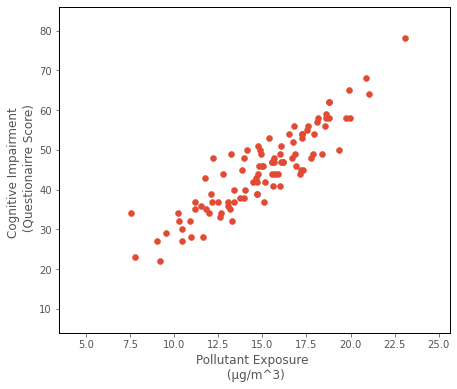

In [10]:
# do not worry about this code, it just runs some functions to generate the graph below
pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null,min_x, max_x, min_y, max_y, pollutant_exposure, cognitive_impairment = py_found.data_gen_pollution()
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

As before, it is important to graphically inspect the data.
    
From the graph above, do you think there is a relationship between `pollutant_exposure` and `cognitive_impairment`? Take a few moments to look at the graph and think about this before reading on... (remember that each point represents a single individual's score on both variables).
    
It does appear, from graphical inspection, that the two variables are related. It looks like people with higher scores on `pollutant_exposure` generally had higher scores on `cognitive_impairment`. 
    
To get a statistic that captures this relationship, we can calculate [Pearson's $r$](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). 
    
Pearson's $r$ ranges from -1 to 1, and indicates the strength and direction of the linear (straight-line) relationship between two numerical variables, the graph below shows some ways the sample could have looked, and what Pearson's $r$ would be in that instance:

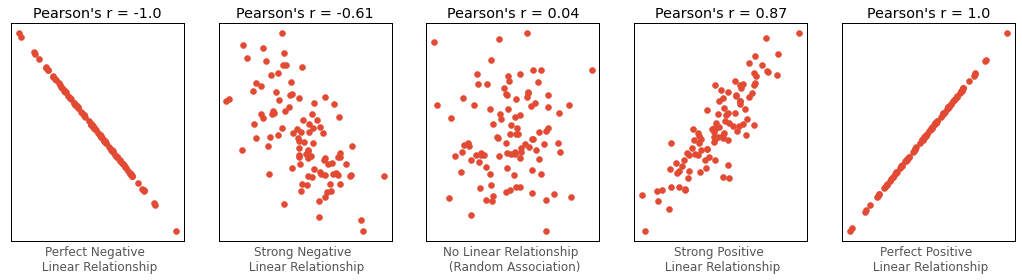

In [11]:
# this code just generates the plot below
py_found.pearson_plot(pollutant_exposure)

[brief explanation of the covariance part of Pearson's r]

Two components:

(`person's pollutant exposure score` - `average pollutant exposure score`) 
If person is above average, we get a bigger number. If they are below average, we get a big *negative* number.

And:

(`person's cognitive impairment score` - `average cognitive impairment score`) 
If person is above average, we get a bigger number. If they are below average, we get a big *negative* number.


Let's calculate Pearson's $r$ for the `pollutant_exposure` and `cognitive_impairment` data from the sample. This statistic is calculated using a python function (more on this [later](3_functions_plotting.ipynb)!). Do not worry about the code, it just calculates Pearson's $r$, and shows how easy it is to calculate statistics using python. Also do not worry about how Pearson'r $r$ is calculated, for now let's just focus on what the statistic tells us:

In [12]:
# this code just calculates pearson's r, rounds it to two decimal places, and then prints it below the cell
actual_r = np.round(scipy.stats.pearsonr(pollutant_exposure, cognitive_impairment)[0], 2)
print("Pearson's r = ", actual_r )

Pearson's r =  0.9


A Pearson's $r$ value of 0.88 represents a strong positive linear relationship between the two variables, meaning that, in our sample of 100 islanders, high `pollutant_exposure` scores are generally paired with high `cognitive_impairment` scores.

## Populations & Samples, Parameters & Statistics

So, is the hypothesis settled then? Can we conclude that `pollutant_exposure` is associated with `cognitive_impairment`?

Remember that our sample is of 100 people. There are 1000 people on the island. Our hypothesis - that `pollutant_exposure` is associated with `cognitive_impairment` - is about all 1000 people on the island, not just the 100 people in our sample.

In statistical terms, our hypothesis is about the *population* of the island. In data science, a '*population*' is defined as all the individuals we could theoretically observe, which are relevant to a particular hypothesis. (More specifically, the population is all the *observational units* we could theoretically observe; in this case, these units are individual people, but in other instances they may be plants, cars, books, stars etc., depending on the subject area!). For our current hypothesis, the population is all the individuals who live on the island.

However, our data comes from our *sample*, which is a subset of the total population.

The numerical characteristics (such as Pearson's $r$) of *populations* are called *parameters*. <br>
The numerical characteristics (such as Pearson's $r$) of *samples* are called *statistics*.

What if the pattern we observe in our sample is not reflective of the pattern in the population? Our sample was drawn randomly, but what if, just by chance, we got a sample which shows a strong relationship, even though none exists in the underlying population?

The two graphs below both show our sample (in red). They also show two ways that the underlying population of all 1000 islanders (shown in dark blue) *could* look: 

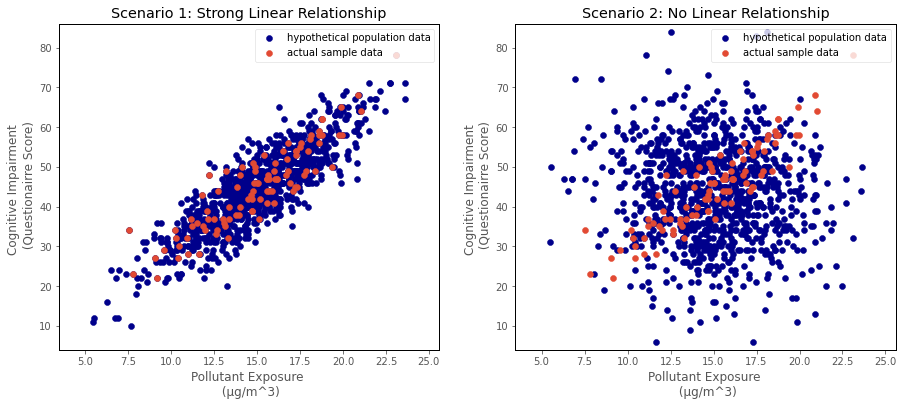

In [13]:
# this code just generates the graph below
py_found.plot_populations(pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null, pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

You can think of each of these graphs as showing two possible states of the world which could have generated our sample. 

In the graph on the left (`Scenario 1`), the pattern in the sample is reflective of the relationship in the underlying population. In `Scenario 1` the hypothetical underlying population shows a *strong positive linear relationship* between `pollutant_exposure` and `cognitive_impariment`. Higher scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`. So if we know a given individual's `pollutant_exposure` score, this tells us a lot about their `cognitive_impairment` score (if their `pollutant_exposure` score is high, their `cognitive_impairment` score is also probably high, and *vice versa*).

In the graph on the right (`Scenario 2`), the pattern in the sample is <b> not </b> reflective of the relationship in the hypothetical underlying population. In `Scenario 2`, the pattern in our sample is a fluke, and if we infer that the pattern in the population is like the one in our sample, we will be making a serious error. The population pattern shown in this graph is one where there is *no linear relationship* between `pollutant_exposure` and `cognitive_impariment`. The two variables are *randomly associated*. What this means is that, if you look at points with high values of `pollutant_exposure`, these are paired with both *high and low* values of `cognitive_impairment`. This means that an individual's `pollutant_exposure` score does not tell us much about their `cognitive_impairment` score...

It is not feasible to observe all 1000 people on the island in order to work out whether `Scenario 1` or `Scenario 2` is true of the actual underlying population. So, we need a good way of making inferences from our sample statistic about the underlying population parameter, in order to work whether the the *actual* population of the island is most similar to the hypothetical population depicted in `Scenario 1` or `Scenario 2`.

This is a fundamental problem of data science: we care about *populations* and *parameters* but all we can usually observe are *samples* and *statistics*. 

We need a way of inferring what the population parameter looks like, based on our sample statistic. Methods of making such inferences, from samples to populations, aim to allow us to be *least wrong most of the time*. However, because we are making inferences about population parameters, rather than directly measuring them, there is always some uncertainty in our estimates and conclusions.

<b> Python gives us a variety of tools that are useful at every stage of this inferential process, from data entry to data analysis. </b> 

But powerful tools are not useful in the absence of clear thinking about what is required to answer a question. So let's think about how we can make a good inference about what the underlying population of the island looks like, based on our sample of 100 islanders...

## The null hypothesis & the null world

To begin the inferential process, we assume that something like `Scenario 2` is true, and ask:

> 'if there was *no relationship* between `pollutant_exposure` and `cognitive_impairment` in the population, how likely is it we would have gotten a sample with the statistic that our sample had?'

This assumption, of no relationship, is called the *null hypothesis*.

What python allows us to easily do, is build a model of a world where the null hypothesis is true (let's call this the [null world](https://uob-ds.github.io/cfd2021/permutation/permutation_and_t_test.html)). Once we have built a model of the null world, we can draw samples from it repeatedly, and record the distribution of sample statistics that we get from our model of the null world. This gives us an idea of the range of Pearson's $r$ values we would expect if the null hypothesis were true: if `pollutant_exposure` and `cognitive_impairment` were randomly associated in the population. 

We can then compare the Pearson's $r$ statistic from the actual sample to the Pearson's $r$ statistics that we get from samples drawn from our model of the null world. If our actual statistic is very unlikely in the null world, we conclude that the actual population of the island is *probably not similar to the null world*.

To get an idea of what we need to do to carry out this inferential process, let's look at the raw data:

In [14]:
# this code just generates the dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': cognitive_impairment})
pd.set_option('display.max_rows',15)
display(df)

,pollutant_exposure,cognitive_impairment
0,16.83,49
1,16.06,47
2,9.05,27
3,14.88,50
4,10.43,27
...,...,...
95,10.98,28
96,12.48,37
97,17.76,48
98,18.59,59


The table above (which, in python, is called a `dataframe`), shows the raw scores for the individuals in our sample. It is truncated for graphical display (as it would be 100 rows long if all of the data was displayed!). 

Each row of the dataframe shows the `pollutant_exposure` and `cognitive_impairment` score for one individual in our sample.

We know that, based on graphical inspection and the Pearson's $r$ we calculated earlier, in this sample *higher* scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`.

However, if in the underlying population there was no relationship between `pollutant_exposure` and `cognitive_impairment`, then if we had a dataframe containing the scores for all 1000 islanders, the association between the `pollutant_exposure` scores and `cognitive_impairment` scores in that population dataframe would be random. Thus, if we drew a sample of 100 scores randomly from that population dataframe, we would expect (on average) the relationship between `pollutant_exposure` and `cognitive_impairment` to also be random in that sample. For one sample, the relationship may not be exactly random, but it should be if we draw repeated samples, as repeated sampling gives us a more accurate picture of the underlying population.


In the dataframe below, the `cognitive_impairment` scores have been shuffled using python. Compare a few rows to the same rows from the dataframe above - you'll see that the `pollutant_exposure` scores are the same for each individual, but the `cognitive_impairment` scores have been randomly shuffled:

In [15]:
# this code just generates the shuffled dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)})

df

,pollutant_exposure,cognitive_impairment
0,16.83,44
1,16.06,62
2,9.05,54
3,14.88,49
4,10.43,42
...,...,...
95,10.98,34
96,12.48,47
97,17.76,62
98,18.59,34


By shuffling the `cognitive_impairment` scores we have simulated a sample from a world where the null hypothesis was true - where the association between the `pollutant_exposure` and `cognitive_impairment` is random.

The three dataframes below show the results of shuffling the `cognitive_impairment` scores three separate times. Again, observe that the `pollutant_exposure` scores stay the same, but the association between them and the `cognitive_impairment` scores is now random:

In [16]:
# set the number of shuffles
n_iters = 3

# perform the shuffles, and display the data each time
for i in np.arange(n_iters):
    print('\nShuffle Number', i+1, ':')
    display(pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)}))


Shuffle Number 1 :


,pollutant_exposure,cognitive_impairment
0,16.83,47
1,16.06,48
2,9.05,51
3,14.88,65
4,10.43,58
...,...,...
95,10.98,47
96,12.48,51
97,17.76,78
98,18.59,33



Shuffle Number 2 :


,pollutant_exposure,cognitive_impairment
0,16.83,46
1,16.06,37
2,9.05,35
3,14.88,65
4,10.43,57
...,...,...
95,10.98,62
96,12.48,56
97,17.76,33
98,18.59,47



Shuffle Number 3 :


,pollutant_exposure,cognitive_impairment
0,16.83,28
1,16.06,47
2,9.05,46
3,14.88,35
4,10.43,35
...,...,...
95,10.98,59
96,12.48,22
97,17.76,49
98,18.59,68


The plots below show how the scatterplot of the sample looks, as the `cognitive_impairment` scores are shuffled 6 separate times:

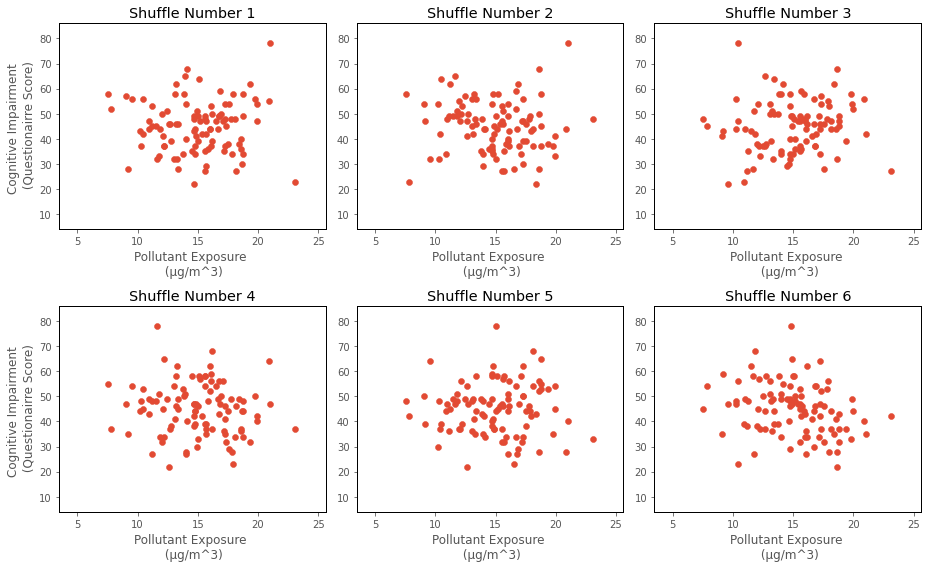

In [17]:
# this code just generates the graphs below
py_found.plot_sample_shuffle(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Relative to the plot of actual sample (shown below), we can see that this shuffling clearly randomizes the relationship between `pollutant_exposure` and `cognitive_impairment`:

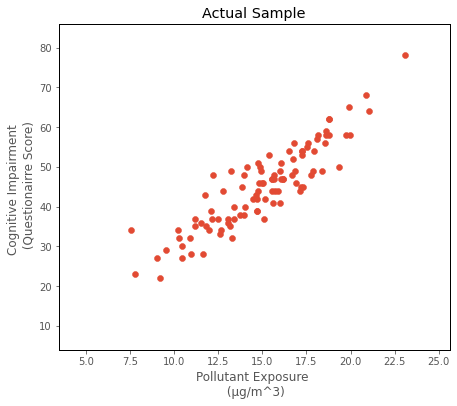

In [18]:
# this code just generates the graph below
plt.title('Actual Sample')
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Samples with random associations are generally what we would expect if the population association was random.

The graph below shows 6 shuffles of the sample, plotted against the hypothetical population from `Scenario 2`, where there is no population relationship between `pollutant_exposure` and `cognitive_impairment`:

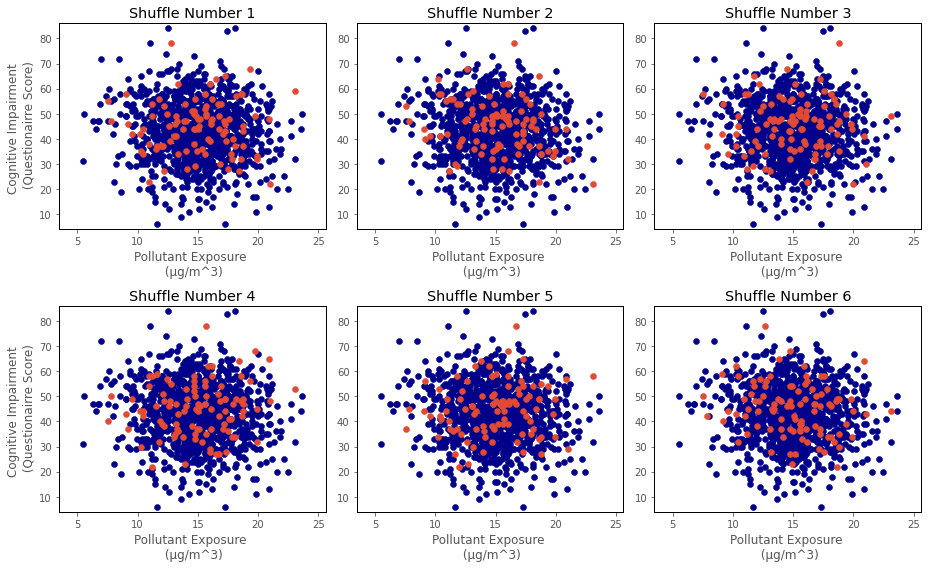

In [19]:
# this code just generates the graphs below
py_found.plot_sample_shuffle_with_pop(pollutant_exposure, cognitive_impairment,  pollutant_exposure_pop, 
                                      cognitive_impairment_pop_null, min_x, max_x, min_y, max_y)

## Simulating the 'null world'

To recapitulate: the shuffling process is simulating a sample from a world in which the null hypothesis is true. E.g. where there is no relationship between `pollutant_exposure` and `cognitive_impairment`.

If we repeat this shuffling process many, many times, and calculate Pearson's $r$ for the shuffled sample each time, we get a distribution of Pearson's $r$ statistics that would be likely if the null hypothesis were true.

This process is called *simulation*. 

The cell below performs this simulation. It shuffles the data, calculates Pearson's $r$ for the shuffled data, and then plots the Pearson's $r$ values obtained from the simulation against the $r$ value from the actual sample. Don't worry about the specifics of the code, they will become clearer in the rest of the textbook, but do pay attention to how few lines of code it takes to perform this simulation:

*Note: as before, the comments (written after the symbol `#`), explain what each line is doing. For now <b> please focus on the comments, rather than the actual code, to understand how the simulation works. </b> We will learn the code later...*

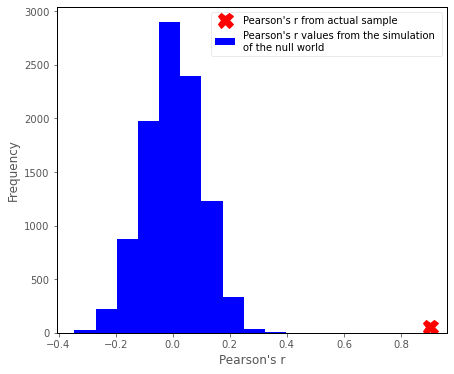

In [20]:
# set the number of times the shuffling process should be repeated
n_iters = 10000

# create an array to store the pearson's r values from the shuffled data
fake_r = np.zeros(n_iters)

# shuffle the data 10,000 times and store the simulated pearson's r values
for i in np.arange(n_iters):
    shuffled_cog_impairment = np.random.permutation(cognitive_impairment)
    fake_r[i] = scipy.stats.pearsonr(pollutant_exposure, shuffled_cog_impairment)[0]

# plot the r values obtained from the simulation of the null world
plt.hist(fake_r, color = 'blue', label = "Pearson's r values from the simulation \nof the null world")

# plot the r value obtained from the actual sample
plt.plot(actual_r, 50, 'X', markersize = 15,  color = 'red', label = "Pearson's r from actual sample")

# label the axes and show the legend
plt.xlabel("Pearson's r")
plt.ylabel('Frequency')
plt.legend();

We can see that, in the simulation, a Pearson's $r$ as large as the one from the actual sample never occurred.

We can conclude that the null hypothesis is probably not true. If it was true, it would be very, very unlikely to get a sample with a relationship as strong as the one we observed.

If fact, we can also easily calculate the percentage of simulated $r$ values which were at least as large as the actual $r$ value we obtained:

In [21]:
# calculate the percentage of pearson's r values from the null world which were at least as large as the actual r value
np.count_nonzero(fake_r >= np.abs(actual_r))/len(fake_r) * 100

0.0

0% of the simulated samples from the null world had Pearson's $r$ values at least as large as the $r$ value from the actual sample.

From this, we can infer that the the actual population of the island is probably not simular to the population simulated in the null world, and that `pollutant_exposure` probably is associated with `cognitive_impairment` in the population of of all 1000 islanders.


## Python makes this process easy

Python makes it easy to perform these sorts of analyses. The aim of this textbook is to teach you the machinery you need to perform them yourself. 

<b> Do not worry if you do not understand the logic of this sort of analysis yet, </b> it will become clearer when you run it yourself in code. The <b> key point is that python makes it easy to build a model of how the world would look if a specific hypotheses were true. </b> We can then compare data from the actual world against data generated from this model, to see if the model is a good model of the actual world.

This is a very powerful method of analysis, and is enabled by the power of modern computers.

## Title for quick illustration of using real data section

While this books uses simulated data for X reasons, the real goal is to understand the world. (Justify simulated data, but tools to analyse real world data based on solid understanding...)

[Python makes the whole data analysis pipeline easy and reproducible etc. show how few lines of code it takes to read in some  UK Gov data about Covid and analyse the trend] https://coronavirus.data.gov.uk/details/cases

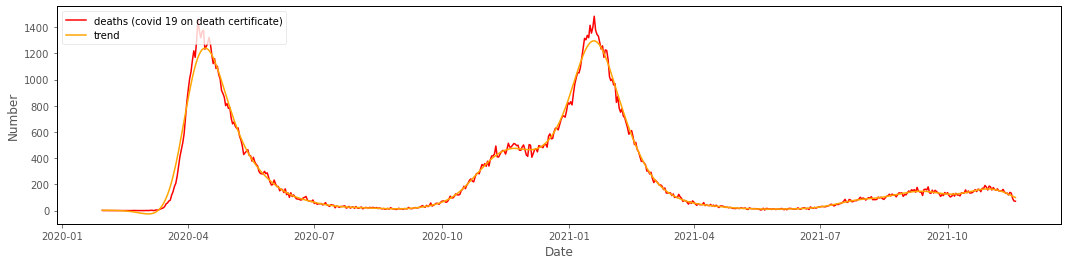

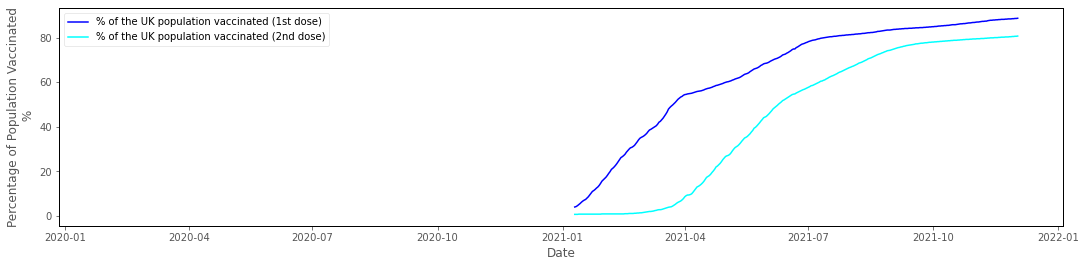

In [22]:
# this just gets rid of an automatic warning, about a future change to one of the libraries 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# creating a dataframe for the 'covid 19 on death certificate' data
deaths = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDailyNsoDeathsByDeathDate%22:%22newDailyNsoDeathsByDeathDate%22,%22cumDailyNsoDeathsByDeathDate%22:%22cumDailyNsoDeathsByDeathDate%22%7D&format=csv')
deaths['date'] = pd.to_datetime(deaths['date'])
deaths.set_index('date', inplace = True)

# creating a dataframe for the cumulative number of vaccinations 
cumulative_vaccinations = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22cumVaccinationFirstDoseUptakeByPublishDatePercentage%22:%22cumVaccinationFirstDoseUptakeByPublishDatePercentage%22,%22cumVaccinationSecondDoseUptakeByPublishDatePercentage%22:%22cumVaccinationSecondDoseUptakeByPublishDatePercentage%22,%22cumVaccinationThirdInjectionUptakeByPublishDatePercentage%22:%22cumVaccinationThirdInjectionUptakeByPublishDatePercentage%22%7D&format=csv')
cumulative_vaccinations['date'] = pd.to_datetime(cumulative_vaccinations['date'])
cumulative_vaccinations.set_index('date', inplace = True)

# using a statistical function from the statsmodels library to extract the trend from the time series
cycle_deaths, trend_deaths = sm.tsa.filters.hpfilter(deaths['newDailyNsoDeathsByDeathDate'])

# plot the deaths, and the trend
plt.figure(figsize = (18,4))
plt.plot(deaths.index, deaths['newDailyNsoDeathsByDeathDate'], label = 'deaths (covid 19 on death certificate)', color = 'red')
plt.plot(deaths.index, trend_deaths, label = 'trend', color = 'orange')                                               
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc = 'upper left')
plt.show()   

# plot the proportion of the UK that has been vaccinated
plt.figure(figsize = (18,4))
plt.plot(deaths.index, np.repeat(0, len(deaths)), alpha = 0)
plt.plot(cumulative_vaccinations.index, cumulative_vaccinations['cumVaccinationFirstDoseUptakeByPublishDatePercentage'], 
         label = '% of the UK population vaccinated (1st dose)', color = 'blue')   
plt.plot(cumulative_vaccinations.index, cumulative_vaccinations['cumVaccinationSecondDoseUptakeByPublishDatePercentage'], 
         label = '% of the UK population vaccinated (2nd dose)', color = 'cyan')    
plt.xlabel('Date')
plt.ylabel('Percentage of Population Vaccinated\n %')
plt.legend(loc = 'upper left')
plt.show() 

Now, let's dive into coding itself on the [next page](2_lists_indexing.ipynb).

Or, you can [return to the main page](0_main_page.ipynb).

To navigate to any other page, the table of contents is below:

## Other Chapters

1. [Populations, Samples & Questions: Why Learn Python?](1_populations_samples_questions.ipynb)
2. [Lists & Indexing](2_lists_indexing.ipynb)
3. [Functions & Plotting](3_functions_plotting.ipynb)
4. [Arrays & Boolean Indexing](4_arrays_booleans.ipynb)
5. [For Loops - doing things over (and over and over...)](5_for_loops.ipynb)
6. [Testing via Simulation: Psychosis Prevalence](6_simulation_psychosis_prevalence.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 